In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras import layers
import datetime
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

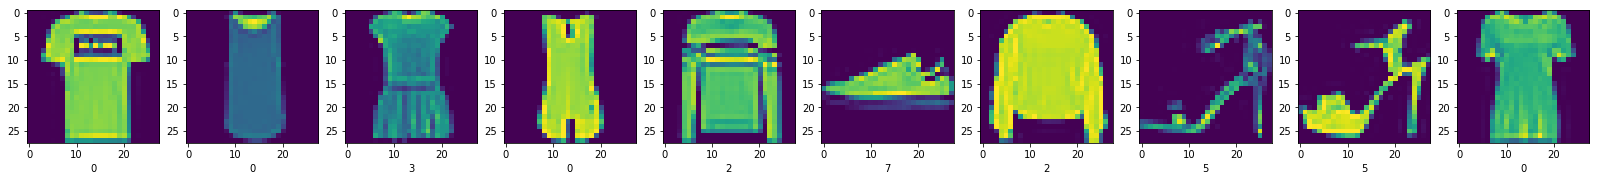

In [3]:

w=10
h=10
fig=plt.figure(figsize=(28, 28))
columns = 10
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i,:].reshape((28,28)))
    plt.xlabel(y_train[i])
plt.show()

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [6]:
def create_model(neurones1 = 16,neurones2 = 32):
    my_input=layers.Input(shape=(28,28,1))
    conv1=layers.Conv2D (neurones1,3,activation='relu', padding='same',strides=1)(my_input)
    pool1=layers.MaxPool2D(pool_size=2)(conv1)
    conv2=layers.Conv2D (neurones2,3,activation='relu', padding='same',strides=1)(pool1)
    pool2=layers.MaxPool2D(pool_size=2)(conv2)
    flat=layers.Flatten()(pool2)
    out=layers.Dense(10,activation = 'softmax')(flat)

    myModel=Model(my_input,out)

    print(myModel.summary())
    myModel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return myModel

In [71]:
model = KerasRegressor(build_fn = create_model )
activation = ['relu','tanh','sigmoid','hard_sigmoid','linear']
learn_rate = [0.001,0.01,0.1,0.2,0.3]
dropout_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
neurones = [32,64]
optimizer = ['SGD','RMSprop','Adagrad','Adadelta','Adam','Adamax']
epochs = [10,20,40]
batch_size = [32,64,256]

param_grid = dict(batch_size=batch_size,neurones1=neurones,neurones2=neurones)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [72]:
trained_model = grid.fit(X_train,y_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                31370     
Total para

In [73]:
print("Best: %f using %s" % (trained_model.best_score_, trained_model.best_params_))
means = trained_model.cv_results_['mean_test_score']
stds = trained_model.cv_results_['std_test_score']
params = trained_model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.350424 using {'batch_size': 32, 'neurones1': 64, 'neurones2': 64}
-0.378016 (0.008031) with: {'batch_size': 32, 'neurones1': 32, 'neurones2': 32}
-0.365393 (0.002485) with: {'batch_size': 32, 'neurones1': 32, 'neurones2': 64}
-0.371473 (0.019191) with: {'batch_size': 32, 'neurones1': 64, 'neurones2': 32}
-0.350424 (0.015651) with: {'batch_size': 32, 'neurones1': 64, 'neurones2': 64}
-0.410020 (0.013901) with: {'batch_size': 64, 'neurones1': 32, 'neurones2': 32}
-0.393715 (0.012351) with: {'batch_size': 64, 'neurones1': 32, 'neurones2': 64}
-0.388357 (0.006958) with: {'batch_size': 64, 'neurones1': 64, 'neurones2': 32}
-0.365543 (0.009468) with: {'batch_size': 64, 'neurones1': 64, 'neurones2': 64}
-0.497706 (0.009804) with: {'batch_size': 256, 'neurones1': 32, 'neurones2': 32}
-0.467032 (0.009267) with: {'batch_size': 256, 'neurones1': 32, 'neurones2': 64}
-0.480698 (0.009724) with: {'batch_size': 256, 'neurones1': 64, 'neurones2': 32}
-0.450288 (0.008519) with: {'batch_size': 

In [11]:
start=datetime.datetime.now()
myModel = create_model(64,64)
trained_model=myModel.fit(X_train,y_train , batch_size=64 , epochs=10 , validation_split=0.2)
end=datetime.datetime.now()
Total_time_training=end-start

print ('Total_time_training:',Total_time_training )

history=trained_model.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                31370     
Total para

10000/10000 [==============================] - 15s 2ms/step


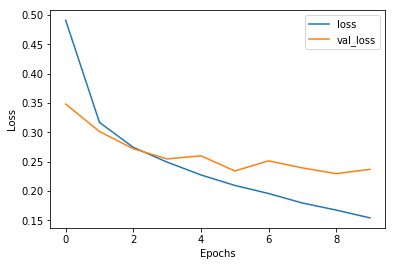

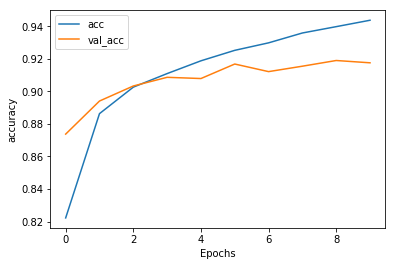

In [12]:
losses=history['loss']
val_losses=history['val_loss']
ac=history['acc']
val_ac=history['val_acc']

import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['loss','val_loss'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(ac)
plt.plot(val_ac)
plt.legend(['acc','val_acc'])

# =============================================================================
# 
# Evaluation
# =============================================================================

predicted_labels=myModel.predict(X_test)
#plt.imshow (test_images[0],cmap='binary')
test_loss,test_acc=myModel.evaluate(X_test,y_test)

In [21]:
print('loss = ',test_loss,'acc = ',test_acc)

loss =  0.2569613894701004 acc =  0.9129
